In [1]:
!pwd

/content


In [2]:
!ls

 sample_data  'South Pacific Post 1955 (manually scanned)-1-2.pdf'


In [3]:
!pip install deepdoctection

In [4]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!sudo apt-get install poppler-utils

In [5]:
from PIL import Image
import numpy as np
import deepdoctection as dd
import matplotlib.pyplot as plt

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
[0808 11:13.37 @utils.py:161]  INF  NumExpr defaulting to 2 threads.
[0808 11:13.38 @env_info.py:449]  WRN  Both DD_USE_TORCH and DD_USE_TF are set. Defaulting to PyTorch. If you want a different behaviour, set DD_USE_TORCH to None before importing deepdoctection.


In [6]:
analyzer = dd.get_dd_analyzer()

[0808 11:13.41 @dd.py:464]  INF  Config: 
 {'DEVICE': device(type='cpu'),
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PDF_MINER': {'X_TOLERANCE': 3, 'Y_TOLERANCE': 3},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
       

d2_model_0829999_layout_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0808 11:13.45 @model.py:1196]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_publaynet_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/143 [00:00<?, ?B/s]

d2_model_1639999_item_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0808 11:13.52 @model.py:1196]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_rc_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/143 [00:00<?, ?B/s]

d2_model_1849999_cell_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0808 11:13.59 @model.py:1196]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_c_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [7]:
analyzer.get_pipeline_info()

{'d3ee7efe': 'image_detectron2_GeneralizedRCNNlayout_d2_model_0829999_layout_inf_only.ts',
 '87e901d1': 'sub_image_detectron2_GeneralizedRCNNitem_d2_model_1639999_item_inf_only.ts',
 '01f98c79': 'sub_image_detectron2_GeneralizedRCNNcell_d2_model_1849999_cell_inf_only.ts',
 'dbf4f87c': 'table_segment',
 '19c9a57c': 'table_segment_refine',
 'a3192d15': 'text_extract_Tesseract_4.1.1',
 'd6219eba': 'matching',
 'f10aa678': 'text_order'}

In [8]:
path = './South Pacific Post 1955 (manually scanned)-1-2.pdf'
df = analyzer.analyze(path=path)
df.reset_state()

In [9]:
doc=iter(df)
page = next(doc)

[0808 11:14.00 @doctectionpipe.py:84]  INF  Processing South Pacific Post 1955 (manually scanned)-1-2_0.pdf
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1541: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return forward_call(*args, **kwargs)
[0808 11:14.16 @context.py:133]  INF  ImageLayoutService total: 11.0148 sec.
[0808 11:14.16 @context.py:133]  INF  SubImageLayoutService total: 0.0001 sec.
[0808 11:14.16 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0808 11:14.16 @context.py:133]  INF  TableSegmentationService total: 0.0001 sec.
[0808 11:14.16 @context.py:133]  INF  TableSegmentationRefinementService total: 0.0 sec.
[0808 11:14.53 @context.py:133]  INF  TextExtractionService total: 36.189 sec.
[0808 11:14.53 @context.py:133]  INF  MatchingService total: 0.0207 sec.
[0808 11:14.53 @context.py:133]  INF  TextOrderSe

In [10]:
type(page)

deepdoctection.datapoint.view.Page

In [11]:
print(f" height: {page.height} \n width: {page.width} \n file_name: {page.file_name} \n document_id: {page.document_id} \n image_id: {page.image_id}\n")

 height: 2100.0 
 width: 1500.0 
 file_name: South Pacific Post 1955 (manually scanned)-1-2_0.pdf 
 document_id: 29f19afa-735e-30d1-8040-d8bbd07adba1 
 image_id: 54cdb5f1-4472-3c4a-a3c3-a70ff8ef8e84



In [12]:
page.get_attribute_names()

{<PageType.ANGLE>,
 'chunks',
 'document_id',
 <PageType.DOCUMENT_TYPE>,
 'file_name',
 <PageType.LANGUAGE>,
 'layouts',
 'location',
 'page_number',
 'tables',
 'text',
 'words'}

In [13]:
page.document_type, page.language

(None, None)

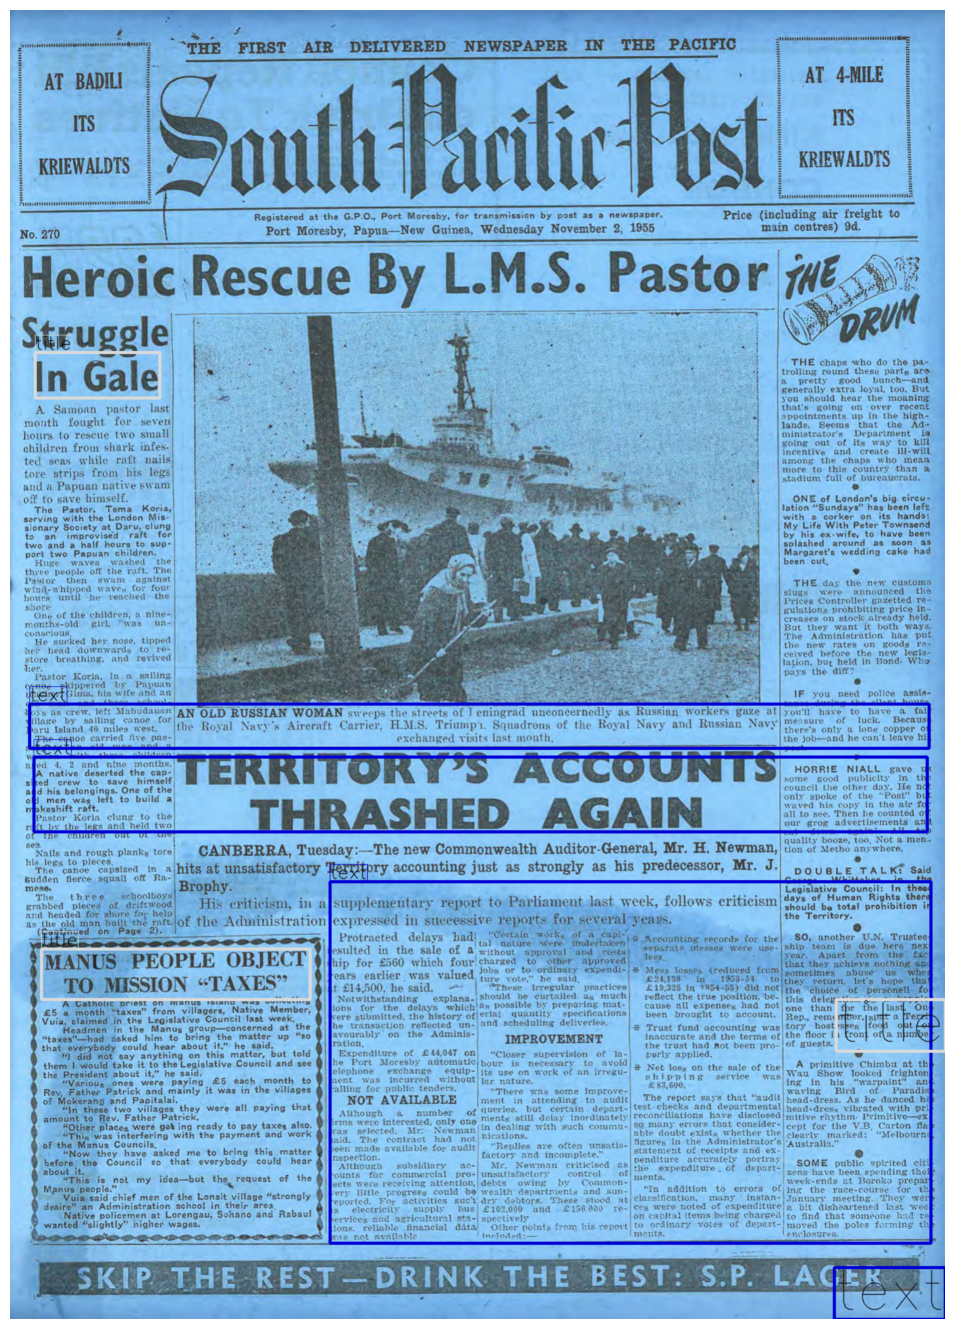

In [14]:
img = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(img)

In [15]:
print(page.text)

In Gale
RU: swecps streets y ss 5 boy 8 ew, lett Mabudauan| AN OLD SSIAN WOMAN the of 1 eningrad unconcerned] yas Russian worker gaze at you'll ave to have a fair village by sailing canoe for Carrier, H.M.S. Triump. Squadrons of the Royal Navy and Russian Na men 0 of luck, Because Air raft Daru Island 40 miles wes the Royal Nav ‘s there's only a lone copper on The canoe carried five pas- e changed visits last month, the job—and he can't leave his old. man and a
e aged 4, 2 and nine months. | TERRITORY’S ACCOUNTS the cap-) HORRIE NIALL gave A na e deserted zed to himself some good publicity in the crew save belongings. One of the council the other 4: He not his left to build a only spoke of the Post” but mei wag THRASHED AGAIN for ift_ raft. waved his copy in the air maker off all to see, Then he counted Pastor Koria clung to the our advertisements and by the legs and held two grog All
days of ive Counci In these supplementary report to Parliament last week, follows criticism Human Righ

In [16]:
len(page.layouts)

5

In [17]:
for layout in page.layouts:
    if layout.category_name=="title":
        print(f"Title: {layout.text}")

Title: MANUS PEOPLE OBJECT TO MISSION “TAXES”
Title: In Gale


In [18]:
page.chunks[0]

('29f19afa-735e-30d1-8040-d8bbd07adba1',
 '54cdb5f1-4472-3c4a-a3c3-a70ff8ef8e84',
 0,
 '09444d1b-bb91-300e-9055-3c06dc2c66a6',
 1,
 <LayoutType.TITLE>,
 'In Gale')

In [19]:
page.chunks[1]

('29f19afa-735e-30d1-8040-d8bbd07adba1',
 '54cdb5f1-4472-3c4a-a3c3-a70ff8ef8e84',
 0,
 '54752c3d-aa30-38d2-96bd-73ec3e16a526',
 2,
 <LayoutType.TEXT>,
 "RU: swecps streets y ss 5 boy 8 ew, lett Mabudauan| AN OLD SSIAN WOMAN the of 1 eningrad unconcerned] yas Russian worker gaze at you'll ave to have a fair village by sailing canoe for Carrier, H.M.S. Triump. Squadrons of the Royal Navy and Russian Na men 0 of luck, Because Air raft Daru Island 40 miles wes the Royal Nav ‘s there's only a lone copper on The canoe carried five pas- e changed visits last month, the job—and he can't leave his old. man and a")

In [20]:
len(page.tables)

0

In [21]:
page2 = next(doc)

[0808 11:14.57 @doctectionpipe.py:84]  INF  Processing South Pacific Post 1955 (manually scanned)-1-2_1.pdf
[0808 11:15.16 @context.py:133]  INF  ImageLayoutService total: 11.4135 sec.
[0808 11:15.16 @context.py:133]  INF  SubImageLayoutService total: 0.0001 sec.
[0808 11:15.16 @context.py:133]  INF  SubImageLayoutService total: 0.0001 sec.
[0808 11:15.16 @context.py:133]  INF  TableSegmentationService total: 0.0001 sec.
[0808 11:15.16 @context.py:133]  INF  TableSegmentationRefinementService total: 0.0001 sec.
[0808 11:15.42 @context.py:133]  INF  TextExtractionService total: 26.4694 sec.
[0808 11:15.42 @context.py:133]  INF  MatchingService total: 0.0207 sec.
[0808 11:15.42 @context.py:133]  INF  TextOrderService total: 0.1455 sec.


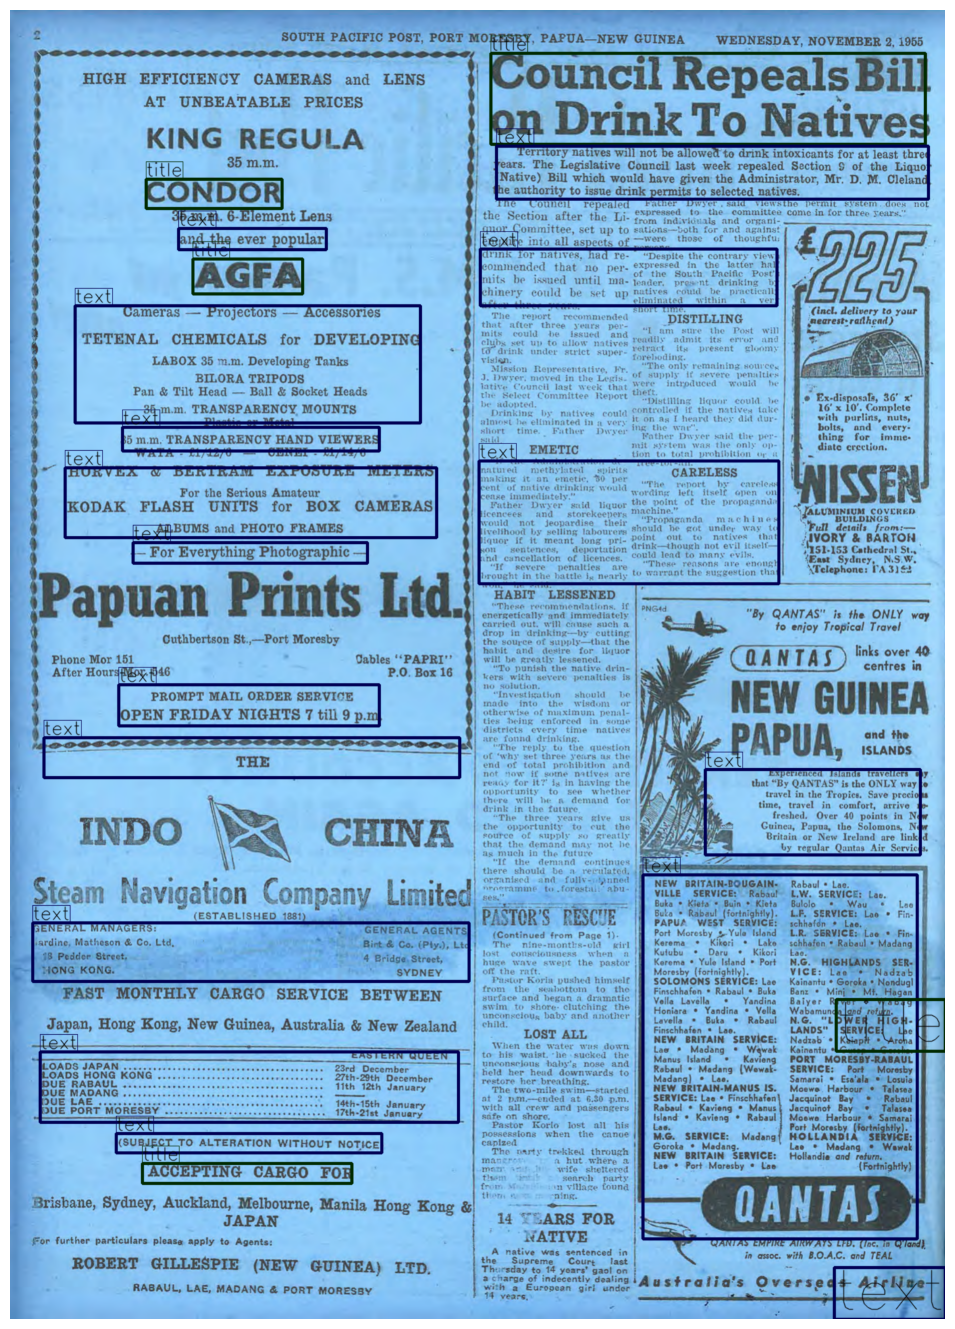

In [22]:
img = page2.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(img)

In [23]:
len(page2.tables)

0

In [24]:
len(page2.layouts)

19

In [25]:
for layout in page2.layouts:
    print('\n'+layout.category_name)
    print(layout.text+'\n')


text
35 mm, TRANSPARENCY HAND VIEWERS


text
Cameras — Projectors — Accessories TETENAL CHEMICALS for DEVELOPING LABOX 35 m.m. Developing Tanks BILORA TRIPODS Pan & Tilt Head — Ball & Socket Heads 35 mm. TRANSPARENCY MOUNTS


title
CONDOR


text
PROMPT MAIL ORDER SERVICE OPEN FRIDAY NIGHTS 7 till 9 p.m.


title
AGFA


title
Council Repeals Bill on Drink To Natives


text
Territory natives will not be allowett te drink intoxicants for at least three years. The Legislative Council last week repealed Section 9 of the Liquor (Native) Bill which would have given the Administrator, Mr. D. M. Cleland, the authority to issue drink permits to selected natives.


text
and the ever popular


title
ACCEPTING CARGO FOR


text
the Admini tion de. “free-for-all” natured methy spirits CARELESS by careless cent of ni e drink is would report, making: it et 0 per ding: left itsel? op on ceaxe immediate! the of the ather Dwyer vid liquor point pro) anda achine, licencees: and storekeepe: m hines y 1d not